In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns",None)

In [3]:
path_pickle = './Pickled/ml_ready.pkl'
# permit_assess.to_pickle(path_pickle)
ml_ready = pd.read_pickle(path_pickle)

In [4]:
numeric_cols = ['SingleLine','Estimated Cost', 'Revised Cost', 'Existing Units', 'Proposed Units', 
                'Number of Bathrooms','Number of Bedrooms','Number of Rooms','Number of Stories',
                'Number of Units', 'Lot Depth', 'Lot Frontage', 'Property Area', 'Basement Area', 
                'Percent of Ownership', 'Misc Exemption Value', 'Homeowner Exemption Value',
                'Assessed Fixtures Value', 'Assessed Improvement Value', 'Assessed Land Value',
                'Assessed Personal Property Value', 'delta_stories', 'delta_units', 'approve_days'    
]

In [5]:
features_labels = ml_ready[numeric_cols].dropna()
features = features_labels[numeric_cols[1:-1]]
labels = features_labels[numeric_cols[-1]]

In [6]:
(ml_ready['Neighborhoods - Analysis Boundaries'].unique())

array(['Oceanview/Merced/Ingleside', 'Russian Hill',
       'Bayview Hunters Point', 'Excelsior', 'Inner Sunset', 'Mission',
       'Outer Mission', 'Sunset/Parkside', 'Haight Ashbury', 'Glen Park',
       'West of Twin Peaks', 'Potrero Hill', 'Portola', 'Pacific Heights',
       'Inner Richmond', 'Outer Richmond', 'Bernal Heights',
       'Castro/Upper Market', 'North Beach', 'Noe Valley',
       'Visitacion Valley', 'Twin Peaks', 'Marina', 'Seacliff',
       'Lone Mountain/USF', 'Presidio Heights', 'Hayes Valley',
       'Nob Hill', 'Presidio', 'Western Addition', nan, 'McLaren Park',
       'South of Market', 'Japantown', 'Lakeshore', 'Chinatown',
       'Financial District/South Beach', 'Lincoln Park', 'Tenderloin',
       'Mission Bay'], dtype=object)

In [7]:
ml_ready[ml_ready['approve_days']>180].shape

(5821, 68)

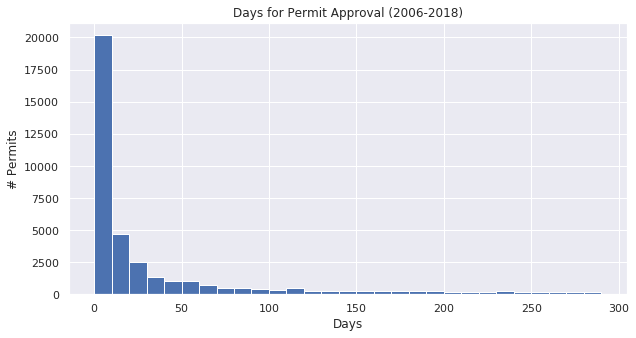

In [12]:
non_zero = ml_ready[ml_ready['approve_days']>0]
plt.figure(figsize=(10,5))
ax = non_zero['approve_days'].hist(
    bins=[x*10 for x in range(30)]
)
ax.set_title('Days for Permit Approval (2006-2018)')
ax.set(xlabel='Days', ylabel='# Permits')
figure = ax.get_figure()
figure.savefig("Approval_Distributions.png")

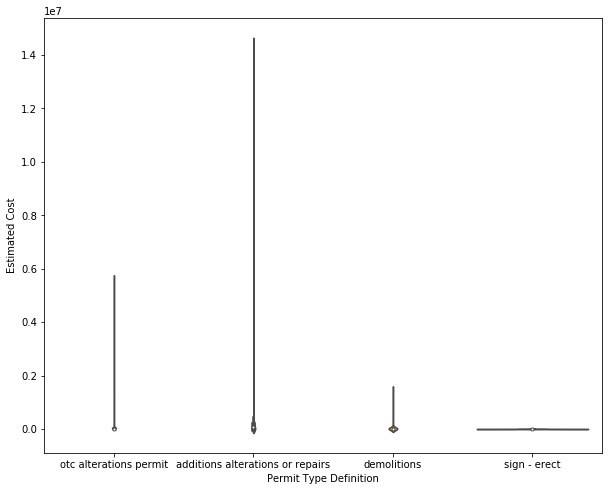

In [390]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Estimated Cost', x = 'Permit Type Definition',data=ml_ready, color='orange')


### With all data in the distribution of days for approval

(array([103473.,   4707.,   2506.,   1327.,   1019.,   1069.,    738.,
           517.,    475.,    436.,    320.,    498.,    277.,    271.,
           266.,    238.,    288.,    232.,    248.,    219.,    194.,
           212.,    193.,    222.,    166.,    187.,    167.,    150.,
           170.,    159.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300]),
 <a list of 30 Patch objects>)

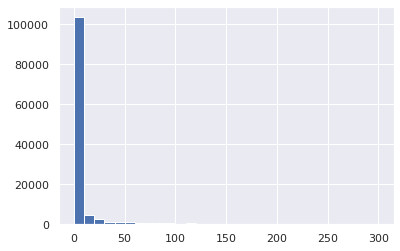

In [8]:
plt.hist(ml_ready['approve_days'], bins=[x*10 for x in range(0,31)])
# sns.distplot(ml_ready['approve_days'],bins=[x for x in range(0,31)])

In [9]:
# skew looks quite high from the plot, and the check below.
ml_ready['approve_days'].skew()

6.1145956798585805

(array([90546.,  4867.,  6480.,  5760.,  4132.,  3534.,  2915.,  3233.,
         2193.,   842.]),
 array([0.        , 0.72841348, 1.45682696, 2.18524044, 2.91365392,
        3.6420674 , 4.37048088, 5.09889436, 5.82730784, 6.55572133,
        7.28413481]),
 <a list of 10 Patch objects>)

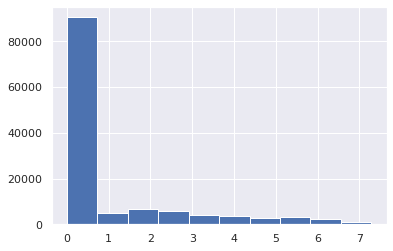

In [10]:
plt.hist(np.log(ml_ready['approve_days']+1))


In [11]:

ml_ready.dtypes.to_frame().transpose()

,Permit Number,Permit Type,Permit Type Definition,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,approval_in_days,Address,SingleLine,Year,assess_id,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Zoning Code,Construction Type,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Tax Rate Area Code,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,delta_stories,delta_units,approve_days
0,object,int64,object,object,object,object,datetime64[ns],datetime64[ns],object,float64,float64,object,float64,float64,object,float64,object,float64,float64,float64,object,object,object,float64,object,float64,object,int64,float64,float64,float64,float64,object,object,object,int64,int64,int64,object,object,object,object,float64,int64,int64,int64,int64,object,object,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,object,object,float64,float64,int64


### LinearRegression

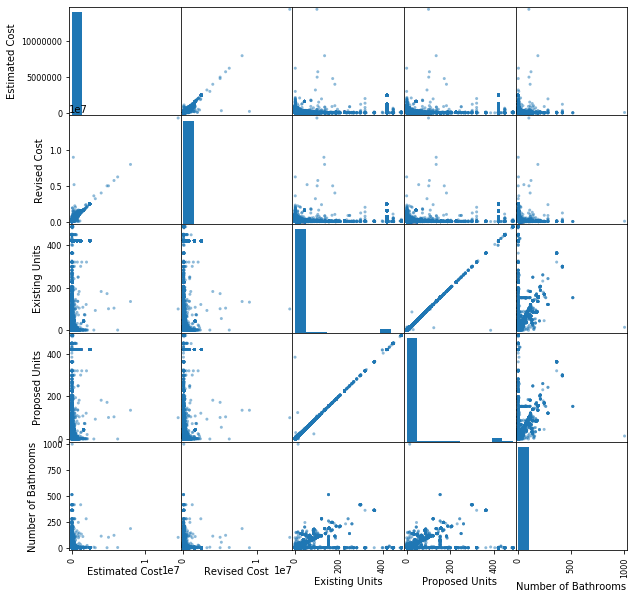

In [311]:
pd.plotting.scatter_matrix(features[numeric_cols[1:6]], figsize=(10,10))
plt.show()

In [10]:
features.isna().sum()

Estimated Cost                      0
Revised Cost                        0
Existing Units                      0
Proposed Units                      0
Number of Bathrooms                 0
Number of Bedrooms                  0
Number of Rooms                     0
Number of Stories                   0
Number of Units                     0
Lot Depth                           0
Lot Frontage                        0
Property Area                       0
Basement Area                       0
Percent of Ownership                0
Misc Exemption Value                0
Homeowner Exemption Value           0
Assessed Fixtures Value             0
Assessed Improvement Value          0
Assessed Land Value                 0
Assessed Personal Property Value    0
delta_stories                       0
delta_units                         0
dtype: int64

In [11]:
labels.shape[0] == features.shape[0]

True

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=41)

In [13]:
lr_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lin', LinearRegression())
])
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

(array([4.000e+00, 5.800e+01, 1.800e+01, 8.500e+01, 2.200e+01, 1.800e+01,
        6.300e+01, 2.200e+01, 2.200e+01, 1.900e+01, 3.500e+01, 2.500e+01,
        5.600e+01, 7.300e+01, 1.470e+02, 2.400e+02, 4.350e+02, 8.020e+02,
        3.090e+03, 3.622e+03, 4.750e+03, 4.546e+03, 3.767e+03, 2.995e+03,
        2.226e+03, 1.658e+03, 1.293e+03, 9.160e+02, 7.220e+02, 6.050e+02]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Patch objects>)

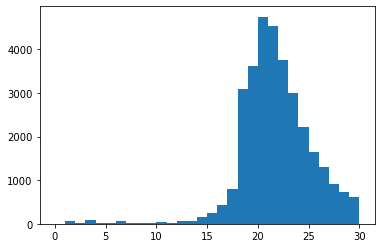

In [14]:
plt.hist((lr_pipe.predict(X_test)), bins=[x*1 for x in range(0,31)])

In [15]:
# looks like just predicting the mean so far.

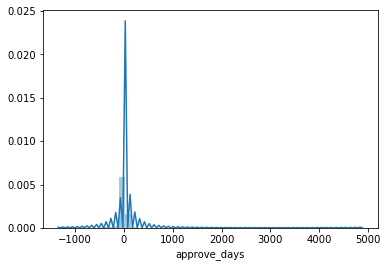

In [16]:
#plot the residuals?
resids = lr_pipe.predict(X_test) - y_test
sns.distplot(resids)

In [17]:
lr_pipe.score(X_train, y_train)

0.12642419920925918

### Remove 0-day approvals ?

In [16]:
fl_nonzero = features_labels[features_labels['approve_days']!=0]
features_nz = fl_nonzero[numeric_cols[1:-1]]
labels_nz = fl_nonzero[numeric_cols[-1]]

In [17]:
np.mean(labels_nz)

80.57561671462653

(array([9587., 4045., 5471., 5117., 3961., 3440., 2893., 3205., 2141.,
         799.]),
 array([0.        , 0.72834482, 1.45668965, 2.18503447, 2.91337929,
        3.64172411, 4.37006894, 5.09841376, 5.82675858, 6.55510341,
        7.28344823]),
 <a list of 10 Patch objects>)

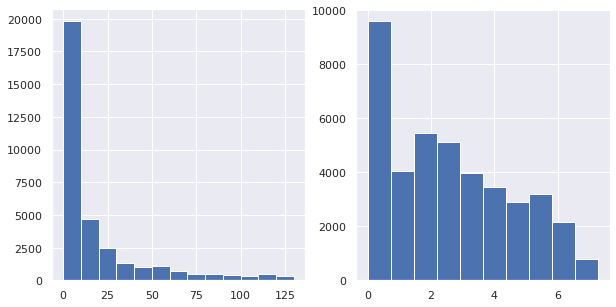

In [64]:
#Rough distribution of the data before linear fit and predict and a log transformation
labels_nz_logx = np.log(labels_nz)
figure = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(labels_nz, bins=[x*10 for x in range(0,14)])
plt.subplot(1,2,2)
plt.hist(labels_nz_logx)

#### DecisionTree / Random Forest

In [19]:
X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(
    features_nz, labels_nz, test_size=0.33, random_state=41)

In [102]:
rf_params = {'max_depth':10, 'min_samples_split':600, 'min_samples_leaf':100}

lr_pipe_nz = Pipeline([
    ('scale', StandardScaler()),
#     ('lin', LinearRegression())
    ('dt', RandomForestRegressor(**rf_params))
])
lr_pipe_nz.fit(X_train_nz, y_train_nz)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dt',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=10,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=100,
                                       min_samples_split=600,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

(array([8.186e+03, 2.387e+03, 8.440e+02, 7.020e+02, 7.450e+02, 8.300e+01,
        1.200e+01, 3.500e+01, 7.000e+00, 4.170e+02]),
 array([  7.44204532,  54.76072795, 102.07941058, 149.39809321,
        196.71677585, 244.03545848, 291.35414111, 338.67282374,
        385.99150637, 433.310189  , 480.62887164]),
 <a list of 10 Patch objects>)

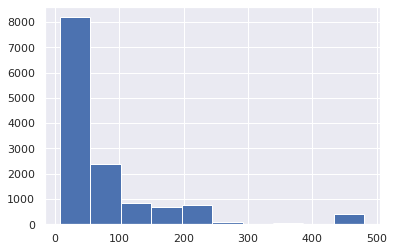

In [103]:
# Rough distribution of the predicted values. Not very close...
plt.hist((lr_pipe_nz.predict(X_test_nz)))

In [104]:
lr_pipe_nz.score(X_train_nz, y_train_nz)

0.3054331573305401

In [105]:
lr_pipe_nz.score(X_test_nz, y_test_nz)

0.2884416378346638

#### log transform the labels prior to fitting?

In [29]:
X_train_nz_logx, X_test_nz_logx, y_train_nz_logx, y_test_nz_logx = train_test_split(
    features_nz, labels_nz_logx, test_size=0.33, random_state=41)

In [364]:
X_train_nz_logx['Estimated Cost'] = np.log(X_train_nz_logx['Estimated Cost'])

/opt/conda/envs/data3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [365]:
X_train_nz_logx

,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area,Basement Area,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,delta_stories,delta_units
53284,10.596635,40000.0,1.0,1.0,2.0,0,6,1,1,0.00,0.0,1696,0,1.00000,0,0,0,488945,733421,0,0.0,0.0
57223,8.294050,4000.0,1.0,1.0,3.0,3,7,2,1,20.00,0.0,2000,300,1.00000,0,7000,0,135197,219708,0,0.0,0.0
42365,9.472705,13000.0,1.0,1.0,3.0,3,10,2,1,20.00,0.0,3600,540,1.00000,0,7000,0,238348,214428,0,0.0,0.0
122466,9.210340,10000.0,2.0,2.0,0.0,0,12,0,2,17.00,0.0,3740,0,1.00000,0,7000,0,1117599,318643,0,0.0,0.0
60110,9.903488,39000.0,1.0,1.0,1.0,0,4,1,1,0.00,0.0,1019,0,0.66666,0,7000,0,31454,30321,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88840,8.922658,9200.0,6.0,6.0,0.0,0,0,0,0,0.00,0.0,0,0,0.33333,0,0,0,0,0,0,0.0,0.0
102596,11.002100,60000.0,5.0,5.0,6.0,6,24,3,5,91.67,0.0,6600,0,1.00000,0,7000,0,687147,926163,1564,0.0,0.0
69086,10.819778,50000.0,1.0,1.0,2.0,0,7,2,1,37.50,0.0,2246,0,0.50000,0,0,0,374760,673588,0,0.0,0.0
4697,6.725034,1000.0,1.0,1.0,1.0,0,6,1,1,0.00,0.0,1640,0,0.50000,0,0,0,59296,52744,0,0.0,0.0


In [366]:
lr_pipe.fit(X_train_nz_logx, y_train_nz_logx)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [367]:
lr_pipe.score(X_train_nz_logx, y_train_nz_logx)

0.1535818143516624

In [368]:
lr_pipe.score(X_test_nz_logx, y_test_nz_logx)

-239646049.03250784

### Tree  :
explicability is good, but watch out for overfitting stil questions about whether or not to treat the 0-day approvals separately. My instinct is that yes, they should be 

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rf_params = {'max_depth':10, 'min_samples_split':600, 'min_samples_leaf':100}
rf = DecisionTreeRegressor(**rf_params)
# rf = RandomForestRegressor(max_depth=4,n_jobs=8)

In [3]:
rf.fit(X_train_nz,y_train_nz)

NameError: name 'X_train_nz' is not defined

In [335]:
X_test

,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area,Basement Area,Percent of Ownership,Misc Exemption Value,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,delta_stories,delta_units
11238,80000.0,80000.0,1.0,1.0,1.0,2,7,1,1,0.0,0.0,1748,0,1.00000,0,7000,0,374606,561908,0,0.0,0.0
1407,1.0,1.0,1.0,1.0,2.0,0,7,1,1,0.0,0.0,1492,0,1.00000,0,7000,0,395890,593836,0,0.0,0.0
75505,8000.0,8000.0,1.0,1.0,2.0,3,8,0,1,20.0,0.0,1770,615,0.50000,0,7000,0,355546,533330,0,0.0,0.0
19113,10000.0,14000.0,1.0,1.0,1.0,0,6,2,1,0.0,0.0,1854,0,1.00000,0,7000,0,335093,478287,0,0.0,0.0
52165,1500.0,1500.0,27.0,27.0,27.0,0,56,4,27,0.0,0.0,11800,0,1.00000,0,0,0,943500,1415250,25369,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67621,50000.0,80000.0,1.0,1.0,1.0,0,7,2,1,14.0,0.0,1658,0,0.50000,0,0,0,329547,768945,0,0.0,0.0
44727,800.0,1500.0,1.0,1.0,2.0,4,8,1,1,0.0,0.0,1520,508,0.50000,0,0,0,169940,349860,0,0.0,0.0
52985,3000.0,6000.0,1.0,1.0,1.0,0,5,1,1,0.0,0.0,1257,0,0.50000,0,0,0,580790,443050,0,0.0,0.0
92378,5700.0,5700.0,4.0,4.0,4.0,0,18,2,4,0.0,0.0,4570,0,1.00000,0,0,0,311911,179946,0,0.0,0.0


Text(0.5, 1.0, 'hist of # permits vs approve_days (decisiontree predictor)')

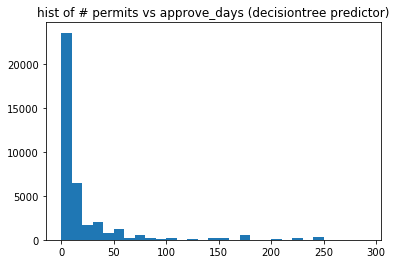

In [336]:
plt.hist(rf.predict(X_test), bins=[x*10 for x in range(0,30)])
plt.title('hist of # permits vs approve_days (decisiontree predictor)')

In [337]:
rf.score(X_train,y_train)

0.34469751441141827

In [338]:
rf.score(X_test, y_test)

0.33878957022392286

In [226]:
# OVERFIT on defaults, and using score indicates 6 max depth is best for even score, 
# but even that doesn't look like a similar distribution

In [227]:
rf.feature_importances_

array([1.10291817e-02, 5.42325961e-01, 1.09292545e-03, 5.71836289e-02,
       0.00000000e+00, 7.41170570e-05, 5.86837291e-04, 0.00000000e+00,
       2.67872938e-02, 6.67024475e-04, 0.00000000e+00, 1.34425718e-02,
       1.23109625e-04, 4.04647378e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.97114316e-04, 4.84345476e-03, 2.18502495e-04,
       1.90678702e-01, 1.50209111e-01])

In [332]:
imp_cols = X_train.columns.values[rf.feature_importances_>0.001]
imp_cols

array(['Estimated Cost', 'Revised Cost', 'Existing Units',
       'Proposed Units', 'Number of Units', 'Property Area',
       'Assessed Land Value', 'delta_stories', 'delta_units'],
      dtype=object)

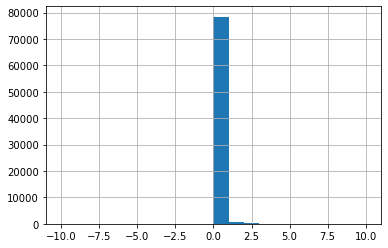

In [353]:
# revised cost was (so far) the most significant feature in the decisiontree, 
# but that's not something that people will have  access to beforehand?
X_train['delta_units'].hist(bins=[x for x in range(-10,11)])

In [214]:
import graphviz 
from sklearn import tree

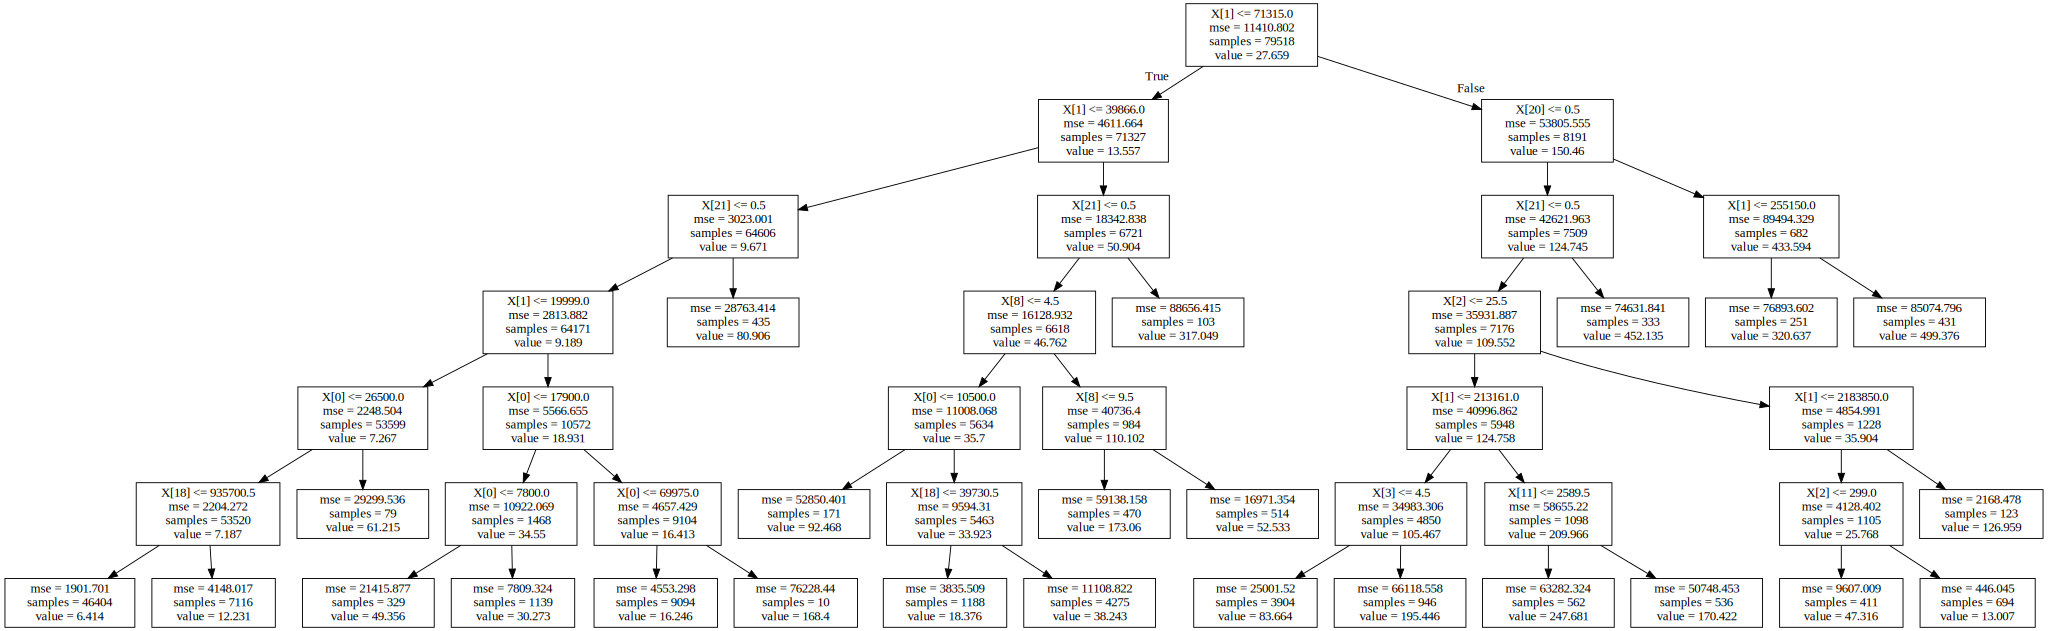

In [215]:
#generate plot of decision tree
graphviz.Source(tree.export_graphviz(rf, out_file=None))

### Need more features - Let's One Hot Encode the descriptions? or try something else


In [184]:
options = [c for c in ml_ready.columns if c not in numeric_cols]
ml_ready[options].head()

,Permit Number,Permit Type,Permit Type Definition,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Existing Use,Proposed Use,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,approval_in_days,Address,Year,assess_id,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,Zoning Code,Construction Type,Lot Area,Tax Rate Area Code,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood
3,201707242676,8,otc alterations permit,"replace (11) windows not visible from street, ...",complete,08/28/2017,2017-07-24,2017-07-24,08/28/2017,2.0,2.0,07/19/2018,1 family dwelling,1 family dwelling,0.0,5.0,wood frame (5),5,wood frame (5),7.0,Oceanview/Merced/Ingleside,94112.0,"(37.722633125765405, -122.46195088671291)",1471551214718,64.0,10.0,8.0,24.0,0 days 00:00:00,242 Ashton Av,2017,1803809,41,SRES,Single Family Residential,D,Dwelling,RH1,D,2809.0,1000.0,3.0,3H,Ingleside
4,201708084132,8,otc alterations permit,replace 6 windows visible from street; no stru...,complete,01/18/2018,2017-08-08,2017-08-08,01/18/2018,2.0,2.0,08/03/2018,1 family dwelling,1 family dwelling,0.0,5.0,wood frame (5),5,wood frame (5),7.0,Oceanview/Merced/Ingleside,94112.0,"(37.722633125765405, -122.46195088671291)",1473665214718,64.0,10.0,8.0,24.0,0 days 00:00:00,242 Ashton Av,2017,1803809,41,SRES,Single Family Residential,D,Dwelling,RH1,D,2809.0,1000.0,3.0,3H,Ingleside
6,201608296300,3,additions alterations or repairs,comply with nov 201625382 permit for furnace/w...,issued,05/30/2019,2016-08-29,2019-05-30,NaN,2.0,2.0,05/24/2020,1 family dwelling,2 family dwelling,2.0,5.0,wood frame (5),5,wood frame (5),11.0,Oceanview/Merced/Ingleside,94132.0,"(37.71566908950004, -122.46503924884911)",1554232514844,65.0,10.0,1.0,24.0,1004 days 00:00:00,274A Victoria St,2016,2018919,42,SRES,Single Family Residential,D,Dwelling,RH1,D,2495.0,1000.0,3.0,3G,Ingleside Heights
8,201609157815,8,otc alterations permit,replace (e) brick foundation in kind with conc...,complete,01/22/2018,2016-09-15,2016-10-06,01/22/2018,2.0,2.0,10/01/2017,1 family dwelling,1 family dwelling,2.0,5.0,wood frame (5),5,wood frame (5),3.0,Russian Hill,94109.0,"(37.795767061509025, -122.41710075059225)",143753060927,16.0,6.0,3.0,32.0,21 days 00:00:00,1310 Pacific Av,2016,1831052,2,MRES,Multi-Family Residential,FS,Flat & Store 4 units or less,NC2,D,1197.0,1000.0,8.0,8C,Nob Hill
10,201610210942,3,additions alterations or repairs,unit legalization ord #43-14. interior alterat...,issued,01/17/2019,2016-10-21,2019-01-17,NaN,2.0,2.0,01/01/2022,1 family dwelling,2 family dwelling,2.0,5.0,wood frame (5),5,wood frame (5),10.0,Bayview Hunters Point,94124.0,"(37.73391776288098, -122.4032854512375)",1538268513959,87.0,2.0,9.0,1.0,818 days 00:00:00,1751A Silver Av,2016,1977365,32,SRES,Single Family Residential,D,Dwelling,RH1,D,2513.0,1000.0,10.0,10G,Silver Terrace


In [258]:
# Existing Construction Type, Neighborhoods, Property Class Code, Use code look reasonable
oh_cols = ['Existing Construction Type Description', 'Neighborhoods - Analysis Boundaries',
           'Use Code', 'Property Class Code', 'Zoning Code', 'approve_days']
ml_ready['Existing Construction Type Description'].value_counts()

wood frame (5)    110848
constr type 1       6278
constr type 3       1311
constr type 2        488
constr type 4        119
Name: Existing Construction Type Description, dtype: int64

In [301]:
ml_ready.loc[:,['Description','approve_days']].head().values

array([['replace (11) windows not visible from street, max u-factor 0.32, no structural changes, vinyl.',
        0],
       ['replace 6 windows visible from street; no structural changes, wood sash max u-factor .32',
        0],
       ['comply with nov 201625382 permit for furnace/water heater. legalize(e)unit (unit b) on grd floor with 1 bedroom, 1 full bath, kitchen & living room per plan. add deck at rear of building for unit a access to rear yard (open common space) per plan. unit legalization ord 43-14.',
        1004],
       ['replace (e) brick foundation in kind with conc. foundation.',
        21],
       ['unit legalization ord #43-14. interior alteration only, no facade changes,  no sq. ftge added, replace garage apt (bdrm, bath, kitchen) with new relocation of bdrm, bath, kitchen & living/rec rm on the (e) 1st flr.',
        818]], dtype=object)

In [259]:
from sklearn.preprocessing import OneHotEncoder

In [260]:
oh_features_labels = ml_ready[oh_cols].dropna()

In [263]:
oh_features = oh_features_labels[oh_cols[:-1]]
oh_labels = oh_features_labels[oh_cols[-1]]

In [372]:
onehot_pipe = Pipeline([
    ('oh', OneHotEncoder()),
    ('dtree', DecisionTreeRegressor(max_depth=12))
])

In [373]:
onehot_pipe.fit(oh_features,oh_labels)

Pipeline(memory=None,
         steps=[('oh',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True)),
                ('dtree',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=12, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)

In [374]:
onehot_pipe.score(oh_features, oh_labels)

0.047094552941678414

In [ ]:
# Permit Type Definition already gives the game away. Can be used as a label to train a classifier that'll subtract these things out, 
# but I'll check for other clues if possible

In [ ]:
# And of course, the grand daddy, Description (NLP needed here)

### Next section